In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

i=pd.read_csv('/home/andre301267/git/BD/temp/imp_fert_ncm_quanti.csv')

In [2]:
ncm=31042090

In [3]:
i=i[i.CO_NCM==ncm]

In [4]:
i=i[i.km==1]

In [5]:
i=i[i.UF=='BA']

In [6]:
i=i.groupby(by=['CO_ANO','CO_MES'])[['KG_LIQUIDO','VL_FOB']].sum().reset_index()

In [7]:
i['kg_12']=i.rolling(12).KG_LIQUIDO.sum()
i['fob_12']=i.rolling(12).VL_FOB.sum()
i['dif_kg']=i.kg_12-i.shift(1).kg_12
i['dif_fob']=i.fob_12-i.shift(1).fob_12
i['date']=pd.to_datetime(i.CO_ANO.astype(str)+'/'+i.CO_MES.astype(str)+'/1')

In [8]:
from sklearn.linear_model import LinearRegression as RFR
RFR=RFR()

In [9]:
i=i.sort_values(by=['date'])

In [10]:
i=i.dropna()

In [11]:
X_prev=pd.DataFrame({'date':[pd.to_datetime('2022/12/01')]})
X_prev

,date
0,2022-12-01


In [12]:
i=i[i.date<X_prev.date[0]]

In [13]:
X_train=i[['date']].iloc[-2:,:].astype(int)
y_train=i.iloc[-2:,:].kg_12

In [14]:
RFR.fit(X_train,y_train)

LinearRegression()

In [15]:
X_prev=X_prev.assign(kg_12=RFR.predict(X_prev.astype(int)))
X_prev

,date,kg_12
0,2022-12-01,6.336977e+08


In [16]:
y_train.iloc[-1]

np.float64(685465547.0)

In [17]:
y_train.iloc[-2]

np.float64(738958991.0)

In [18]:
y_train.iloc[-3]

IndexError: single positional indexer is out-of-bounds

In [19]:
i=pd.concat([i[['date','kg_12']].assign(tipo='real'),X_prev.assign(tipo='prev')]).sort_values('date')

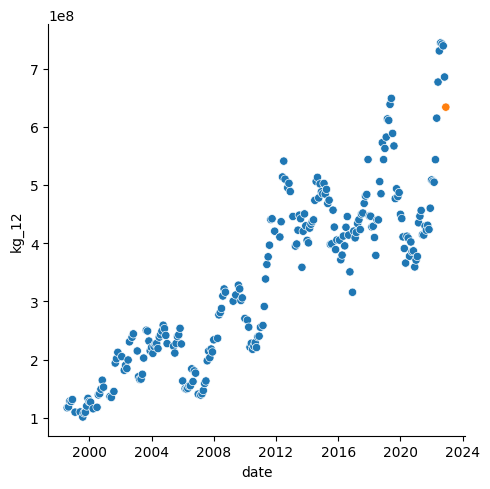

In [20]:
sns.relplot(data=i,x='date',y='kg_12',hue='tipo',legend=False)

In [21]:
sns.relplot(data=i,x='date',y='fob_12',hue='tipo',legend=False)

ValueError: Could not interpret value `fob_12` for `y`. An entry with this name does not appear in `data`.

In [ ]:
i['fob_kg']=i.fob_12/i.kg_12

In [ ]:
sns.relplot(data=i,x='date',y='fob_kg',legend=False)